##**Programação e Algoritmos II**

Prof. Alexandre Levada

###**Random Walks e o modelo Pagerank**

Random walks (caminhadas aleatórias) são processos estocásticos definidos a partir um conjunto finitos de estados e probabilidades de transição entre esses estados. Em um primeiro momento, iremos concentrar nossos estudos em caminhadas aleatórias em grafos não direcionados. Seja $G = (V, E)$ um grafo básico simples não direcionado com matriz de adjacências simétrica $A$. Então, podemos definir a seguinte matriz $P$:

$$
P = \Delta^{-1}A  
$$ onde

$$
\Delta^{-1} = \begin{bmatrix}
                    \frac{1}{d(v_1)} & 0 & 0 & ... & 0 \\
                    0 & \frac{1}{d(v_2)} & 0 & ... & 0 \\
                    0 & 0 & \frac{1}{d(v_3)} & ... & 0 \\
                    \vdots & \vdots & \vdots & \ddots & 0 \\
                    0 & 0 & 0 & ... & \frac{1}{d(v_n)}
              \end{bmatrix}                    
$$

Note que ao multiplicar $\Delta^{-1}$ por $A$, o que ocorre é a divisão de cada elemento $a_{ij}$ de $A$ pela soma dos elementos da i-ésima linha. Por exemplo, considere o grafo a seguir:

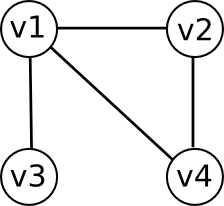

$$
P = \Delta^{-1}A = \begin{bmatrix}
                    \frac{1}{3} & 0 & 0 & 0 \\
                    0 & \frac{1}{2} & 0 & 0 \\
                    0 & 0 & 1 & 0 \\
                    0 & 0 & 0 & \frac{1}{2}
                  \end{bmatrix}    
                  \begin{bmatrix}
                    0 & 1 & 1 & 1 \\
                    1 & 0 & 0 & 1 \\
                    1 & 0 & 0 & 0 \\
                    1 & 1 & 0 & 0
                  \end{bmatrix}  =
                  \begin{bmatrix}
                    0 & \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
                    \frac{1}{2} & 0 & 0 & \frac{1}{2} \\
                    1 & 0 & 0 & 0 \\
                    \frac{1}{2} & \frac{1}{2} & 0 & 0
                  \end{bmatrix}    
$$

Note que a matriz P não é simétrica! (Ela não representa um grafo mas sim um dígrafo, que nada mais é que um grafo direcionado).

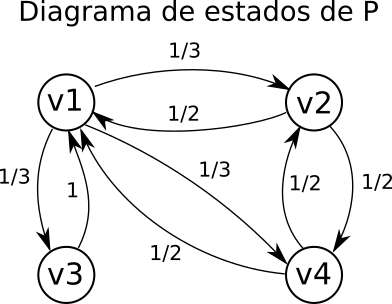



Note que isso significa que, para todo i, j temos:

$$
p_{ij} = \frac{a_{ij}}{\sum_{j}a_{ij}}
$$

ou seja, $p_{ij} \in [0, 1]$ (representa a probabilidade de sair de i e chegar em j com uma única aresta).

Chamamos $P$ de matriz de probabilidades de transição de estados, pois ela define um processo aleatório conhecido como Cadeia de Markov. Toda matriz $P$ pode ser representada graficamente por um diagrama de estados.

###**Cadeias de Markov Homogêneas**

**Def:** Uma cadeia de Markov homogênea de estados finitos e tempo discreto pode ser definida pela tupla:

$$
CMH = (S, X_k, P, \vec{w}^{(k)})
$$

onde

i) $S = {s_1, s_2, ..., s_n}$ é o conjunto de estados

ii) $X_k$ é uma variável aleatória discreta que assume valores em S

iii) $\vec{w}^{(k)}$ é um vetor de probabilidades de cada estado no tempo k

$$
\vec{w}^{(k)} = \left[ p(X_k = s_1), p(X_k = s_2), p(X_k = s_3), ..., p(X_k = s_n) \right]
$$

em que o i-ésimo elemento do vetor $\vec{w}^{(k)}$ denota a probabilidade de no tempo k estarmos no estado $s_i$

$\vec{w}^{(0)}$: probabilidade de iniciar o processo em cada um dos estados: na analogia com autômatos finitos ao invés de um único estado inicial, podemos ter vários deles (com probabilidades iguais ou diferentes - é uma distribuição de probabilidades inicial).

Note que sempre a soma dos elementos do vetor $\vec{w}^{(0)}$ deve ser sempre igual a 1.

iv) $P$ é a matriz de probabilidades de transição de estados (função de transição)

Cadeia de Markov Homogênea significa que a matriz P não muda no tempo, ou seja, é fixa para todo k.

Porque uma matriz de transição de estados?

*Propriedade Markoviana* (cadeia de Markov): o futuro só depende do presente e não de todo passado anterior

Para uma sequência $X_0, X_1, X_2, ..., X_n$ de observações, a probabilidade conjunta é dada por:

$$
P(X_0, X_1, X_2, ..., X_n) = \prod_{t=0}^{T}P(X_t | X_0, X_1, X_2, ..., X_{t-1}) \\
= P(X_0)P(X_1|X_0)P(X_2|X_0, X_1)P(X_3|X_0, X_1, X_2) ... P(X_T|X_0, X_1, X_2, ..., X_{T-1})
$$

Se o processo é Markoviano, ou seja, sem memória, então:

$$
P(X_T|X_0, X_1, X_2, ..., X_{T-1}) = P(X_T|X_{T-1})
$$

A probabilidade de estar no estado T dado que passamos por 0, 1, 2, … T-1 só depende do último estado em que estive, ou seja, T-1 (cadeias de Markov de primeira ordem podem ser representadas por matrizes de transição em que a probabilidade de transicionar de i para j é dado por $P_{ij} = P(X_j|X_i)$)

Em outras palavras, a probabilidade de acessar um estado $s_3$ no tempo $t$ não depende do histórico todo, mas apenas do estado que estava no tempo anterior, ou seja, $t-1$.

###**Equações de Chapman-Kolmogorov**

As equações de Chapman-Kolmogorov fornecem um método para calcular as probabilidades de transição em $n$ etapas. Na forma vetorial, a relação entre a distribuição de probabilidades dos estados no tempo $k$ e no tempo $k-1$ pode ser expressa por uma equação linear, dada por:

$$
\vec{w}^{(k)} = \vec{w}^{(k-1)} P
$$

Suponha um simples modelo de previsão do tempo composto por 3 estados: ensolarado (sunny), nublado (cloudy) e chuvoso (rainy) e as seguintes probabilidades de transição:

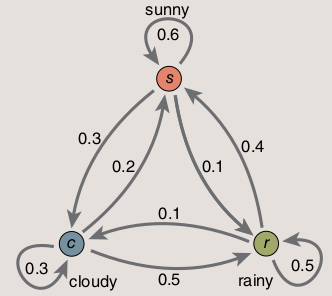



Podemos representar esse processo por uma cadeia de Markov com a seguinte matriz de probabilidades de transição:

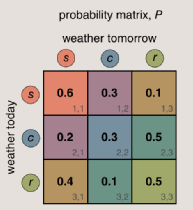

Pergunta-se: se hoje está ensolarado, qual é a probabilidade de amanhã chover?

Isso significa que a distribuição de probabilidades inicial é dada por:

$$
\vec{w}^{(0)} = [1, 0, 0]
$$

Para isso, devemos calcular (Power method):

$$
\vec{w}^{(1)} = \vec{w}^{(0)} P = [1, 0, 0] \begin{bmatrix}
                          0.6 & 0.3 & 0.1 \\
                          0.2 & 0.3 & 0.5 \\
                          0.4 & 0.1 & 0.5
                          \end{bmatrix} = [0.6, 0.3, 0.1]
$$

ou seja, a probabilidade de chuva amanhã é 10%. Agora, suponha que deseja-se saber a probabilidade de chover daqui a 2 dias. Para isso, devemos calcular:

$$
\vec{w}^{(2)} = \vec{w}^{(1)} P = [0.6, 0.3, 0.1] \begin{bmatrix}
                          0.6 & 0.3 & 0.1 \\
                          0.2 & 0.3 & 0.5 \\
                          0.4 & 0.1 & 0.5
                          \end{bmatrix}
$$

Mas isso é equivalente a:

$$
\vec{w}^{(2)} = (\vec{w}^{(0)} P) P = \vec{w}^{(0)}P^2 = [1, 0, 0]  
                          \begin{bmatrix}
                          0.46 & 0.28 & 0.26 \\
                          0.38 & 0.2 & 0.42 \\
                          0.46 & 0.2 & 0.34
                          \end{bmatrix} = [0.46, 0.28, 0.26]
$$

A probabilidade de chuva daqui a 2 dias é 26%. No longo prazo, por exemplo, daqui a 10 dias, qual seriam as probabilidades de sol, nublado e chuva?

$$
\vec{w}^{(10)} = \vec{w}^{(0)} P^{10} = [1, 0, 0]  
                          \begin{bmatrix}
                          0.441 & 0.235 & 0.323 \\
                          0.441 & 0.235 & 0.323 \\
                          0.441 & 0.235 & 0.323
                          \end{bmatrix} = [0.441, 0.235, 0.323]
$$

Note que quando $k$ cresce, as linhas e colunas da matrix $P^k$ tornam-se estacionárias. Isso ocorre porque $P$ é uma matriz composta apenas por probabilidades. Na pratica, isso significa que a distribuição estacionária não depende da distribuição de probabilidades inicial (como todas as linhas da matriz $P^k$ são iguais, não importa a configuração do vetor $\vec{w}^{(0)}$.

A pergunta que surge é: em uma caminhada aleatória em grafos, sob quais condições a distribuição estacionária converge?

Irá depender diretamente de propriedades matemáticas relacionadas as componentes do modelo. 

A seguir listamos algumas propriedades fundamentais de Cadeias de Markov Homogêneas.

**Def:** Uma CM homogênea é irredutível se é possível atingir qualquer estado i a partir de qualquer outro j. Em termos práticos, isso significa que o diagrama de estados de $P$ deve ser conexo.

**Def:** Uma CM homogênea é aperiódica se contém apenas elementos não nulos. Em termos práticos, isso significa que o diagrama de estados de $P$ não pode ser um grafo bipartido.

**Def:** Se um CM homogênea é irredutível e aperiódica então ela é ergódica.

Pode-se mostrar que caminhadas aleatórias em grafos não direcionados satisfazem:

i) P é irredutível se e somente se G é conexo

ii) P é aperiódica se e somente se G não é bipartido

iii) P é reversível, isto é atinge o equilíbrio (no equilíbrio a matriz P se comporta como se fosse simétrica)

Obs: Na prática para determinar se CMH é ergódica basta gerar a matriz $P$ e computar $P^k$, para $k$ suficientemente grande. Se todos os seus elementos forem não nulos, CMH é ergódica.

**Teorema Fundamental das Cadeias de Markov**

Seja $P$ a matriz de probabilidades de transição de uma CM homogêna ergódica. Então a distribuição estacionária existe, é única e é dada por:

$$
\lim_{k \to \infty}P^k = \begin{bmatrix}
                          \vec{w}^{(k)} \\
                          \vec{w}^{(k)} \\
                          \vdots \\
                          \vec{w}^{(k)}
                         \end{bmatrix}
$$

onde $\vec{w}^{(k)}$ é a distribuição estacionária. Note que a distribuição estacionária não depende de $\vec{w}^{(0)}$, ou seja, da distribuição inicial.

**Solução analítica**

Pode-se mostrar que no caso de CM’s ergódicas é possível computar a distribuição estacionária teórica (analítica). Por exemplo, no caso de caminhadas aleatórias em grafos não direcionados, conexos e não bipartidos podemos obter $\vec{w}^{(k)}$ sem adotar o método iterativo. 

Como a CMH é reversível, ou seja, função de transição se comporta como se fosse simétrica no equilíbrio, temos:

$$
w_i p_{ij} = w_j p_{ji}
$$

Essa condição siginifica que a probabilidade de estar no estado i e transicionar de i para j é igual a probabilidade de estar no estado j e transicionar de j para i.

Da matriz P sabemos que $p_{ij} = \frac{1}{d(v_i)}$ então:

$$
w_i \frac{1}{d(v_i)} = w_j \frac{1}{d(v_j)} = K
$$

Assim, temos:

$$
w_i = K d(v_i) 
$$

Somando ambos os lados em relação a i:

$$
\sum_{i=1}^{n} w_i = K \sum_{i=1}^{n}d(v_i)
$$

Pelo Handshaking Lema, a equação anterior fica:

$$
1 = K 2m
$$

ou seja:

$$
K = \frac{1}{2m}
$$

Portanto, temos que a distribuição estacionária é dada por:

$$
\vec{w} = \left[ \frac{d(v_1)}{2m}, \frac{d(v_2)}{2m}, ..., \frac{d(v_n)}{2m} \right]
$$

onde $m$ é o número de arestas do grafo.



###**O Modelo Pagerank**

Motivação: Caminhadas aleatórias em dígrafos (i.e., internet)

**Problema:** Cadeia de Markov não é irredutível nem aperiódica, e portanto a distribuição estacionária não é única (depende diretamente de onde começo: $\vec{w}_0$)

É preciso ajustar o modelo padrão para resolver dois problemas:

a) Presença de dangling nodes (pontos sem saída): estados absorventes, uma vez acessado nunca mais sairá.

*Solução:* permitir eventuais saltos, com pequena probabilidade

Ligar todos os nós com todos com probabilidade uniforme (1/n)


b) Pode não existir $k$ tal que seja possível estar em qualquer estado com probabilidade não nula (ficamos presos em um subgrafo, o que pode tornar a caminhada determinística/periódica)

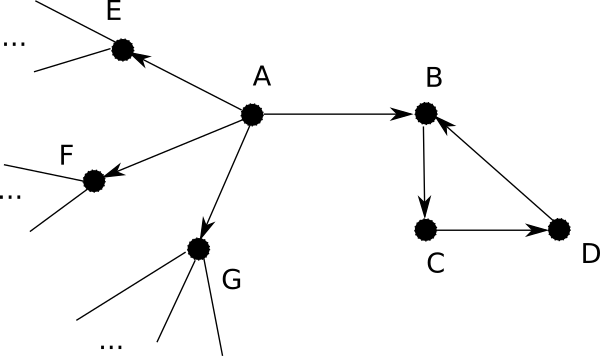


Grafos bipartidos tornam processo periódico.

*Solução:* permitir loops (posso permanecer num estado com uma dada probabilidade)

Introduzir elementos não nulos na diagonal de P

Ideia geral: processo estocástico que modela um navegador que
- realiza uma caminhada aleatória padrão com probabilidade $(1- \alpha)$
- salta para um estado aleatório com probabilidade $\alpha$ (teleporte)

Pode-se mostrar que esse processo é equivalente a modelar uma Cadeia de Markov caracterizada pela seguinte matriz de transição, também conhecida como Google matrix:

$$
\overline P = (1 - \alpha) P + \alpha \frac{1}{n} U
$$

onde

$$
U = \begin{bmatrix}
    1 & 1 & ... & 1 \\
    1 & 1 & ... & 1 \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & 1 & ... & 1
    \end{bmatrix}
$$

é uma matriz de 1's.

Observações:

1. $\alpha = 0$ → $\overline P = P$ (random walk padrão)

Distribuição estacionária depende de $\vec{w}^{(0)}$ (não é única)

2. $\alpha = 1$ → distribuição estacionária totalmente não informativa (descarta completamente a topologia de G)

*Objetivo:* encontrar compromisso entre os casos limites.

Ex: Calcule a matriz $\overline P$ (Google matrix) para o seguinte grafo direcionado.

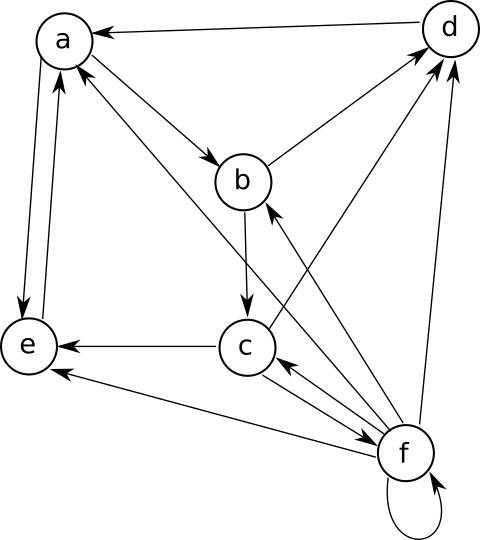

De posse do grafo, geramos a matriz de transição de probabilidade P.

$$
P = \begin{bmatrix}
    0 & \frac{1}{2} & 0 & 0 & \frac{1}{2} & 0 \\
    0 & 0 & \frac{1}{2} & \frac{1}{2} & 0 & 0 \\
    0 & 0 & 0 & \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
    1 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 \\
    \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \\
    \end{bmatrix}
$$

OBS: Se existir nós sem saída (dangling nodes), a linha toda referente a cada um deles em P será composta apenas por zeros. As linhas nulas de P deverão ser substituídas por linhas constantes em que o valor de todos os elementos é igual a $\frac{1}{n}$.

Vamos considerar um valor de $\alpha=0.15$. Então:

$$
\overline P = 0.85 P + 0.15 \frac{1}{6}U
$$

A linha 1 de $\overline P$ será composta por dois valores distintos:

$$
\frac{85}{100}\frac{1}{2} + \frac{15}{100}\frac{1}{6} = \frac{85}{200} + \frac{5}{200} = \frac{90}{200} = \frac{18}{40}
$$

e

$$
\frac{15}{100}\frac{1}{6} = \frac{5}{200} = \frac{1}{40}
$$

A linha 2 de $\overline P$ será composta pelos mesmos valores obtidos para a linha1. A linha 3 de $\overline P$ será composta pelos seguintes valores:

$$
\frac{85}{100}\frac{1}{3} + \frac{15}{100}\frac{1}{6} = \frac{85}{300} + \frac{5}{200} = \frac{185}{600} = \frac{37}{120}
$$

e

$$
\frac{15}{100}\frac{1}{6} = \frac{5}{200} = \frac{1}{40} = \frac{1}{120}
$$

A linha 4 de $\overline P$ será composta pelos seguintes valores:

$$
\frac{85}{100} + \frac{15}{100}\frac{1}{6} = \frac{85}{100} + \frac{5}{200} = \frac{175}{200} = \frac{35}{40}
$$

e

$$
\frac{15}{100}\frac{1}{6} = \frac{5}{200} = \frac{1}{40} 
$$

A linha 5 de $\overline P$ será composta pelos mesmos valores da linha 4. Por fim, a linha 6 será composta pelos seguintes valores:

$$
\frac{85}{100}\frac{1}{6} + \frac{15}{100}\frac{1}{6} = \frac{1}{6}\left( \frac{85}{100} + \frac{15}{100} \right) = \frac{1}{6}
$$

Portanto, a matriz $\overline P$ é dada por:

$$
P = \begin{bmatrix}
    \frac{1}{40} & \frac{18}{40} & \frac{1}{40} & \frac{1}{40} & \frac{18}{40} & \frac{1}{40} \\
    \frac{1}{40} & \frac{1}{40} & \frac{18}{40} & \frac{18}{40} & \frac{1}{40} & \frac{1}{40} \\
    \frac{3}{120} & \frac{3}{120} & \frac{3}{120} & \frac{37}{120} & \frac{37}{120} & \frac{37}{120} \\
    \frac{35}{40} & \frac{1}{40} & \frac{1}{40} & \frac{1}{40} & \frac{1}{40} & \frac{1}{40} \\
    \frac{35}{40} & \frac{1}{40} & \frac{1}{40} & \frac{1}{40} & \frac{1}{40} & \frac{1}{40} \\
    \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \\
    \end{bmatrix}
$$

Note que cada uma das linhas da matriz $\overline P$ somam 1.

Essa matriz ajustada pelo modelo Pagerank define uma Cadeia de Markov irredutível e aperiódica, de modo que agora a distribuição estacionária é única e não depende de $\vec{w}^{(0)}$.

Na prática isso significa que o ranking gerado pelos valores de pageranks é único (coeficientes da distribuição estacionária). Seria um problema para o Google se os pageranks das páginas fosse dependente da inicialização. Dependendo de onde o web crawler partisse poderíamos ter diferentes pageranks para a mesma página, ou seja, a inconsistência seria bem grande.

Uma pergunta natural que surge é: existe solução analítica ou preciso usar o Power Method?

Note que no equilíbrio, isto é, quando a distribuição estacionária converge temos:

$$
\vec{w} = \vec{w}\overline P
$$

Substituindo o a expressão para $\overline P$:

$$
\vec{w} = \vec{w} \left[ (1 - \alpha) P + \alpha \frac{1}{n} U \right]
$$

Aplicando a distributiva:

$$
\vec{w} = (1 - \alpha)\vec{w} P + \alpha \frac{1}{n} \vec{w} U
$$

Como $\vec{w} U = \vec{u} = [1, 1, ..., 1]$ e sabendo que $I$ denota a matriz identidade temos:

$$
I \vec{w} = (1 - \alpha)\vec{w} P + \alpha \frac{\vec{u}}{n} 
$$

Isolando o vetor $\vec{w}$ do lado esquerdo da equação:

$$
I \vec{w} - (1 - \alpha)\vec{w} P = \alpha \frac{\vec{u}}{n} 
$$

Colocando $\vec{w}$ em evidência:

$$
\left[ I - (1 - \alpha)P \right]\vec{w} = \alpha \frac{\vec{u}}{n} 
$$

o que finalmente nos leva a:

$$
\vec{w} = \alpha \frac{\vec{u}}{n} \left[ I - (1 - \alpha)P \right]^{-1}
$$

Portanto, embora exista uma solução analítica ela é inviável devido a necessidade de inversão da matriz $I - (1 - \alpha)P$. Imagine se o Google tivesse que inverter uma matriz referente ao grafo de toda internet! É computacionalmente impossível!

**Interpretação do Pagerank**

Pode-se reescrever $\vec{w}$ de modo a expressar a soma de uma P.G. infinita. Note que:

$$
S_{\infty} = \frac{1}{1 - q} = (1 - q)^{-1}
$$

onde $q$ é a razão da progressão geométrica.

Na forma matricial, identificando a razão como sendo o termo $(1 - \alpha)P$ temos que:

$$
\left[ I - (1 - \alpha)P \right]^{-1} = \sum_{k=1}^{\infty} [(1 - \alpha)P]^k
$$

o que nos leva a:

$$
\vec{w} = \alpha\frac{\vec{u}}{n} \sum_{k=1}^{\infty} (1 - \alpha)^k P^k = \frac{\vec{u}}{n} \left[ (1-\alpha)P + (1-\alpha)^2 PP + (1-\alpha)^3 PPP + ... \right] \alpha
$$

onde 

$\frac{\vec{u}}{n}$ representa a probabilidade uniforme do usuário escolher uma página da internet aleatória

$\left[ (1-\alpha)P + (1-\alpha)^2 PP + (1-\alpha)^3 PPP + ... \right]$ representa a probabilidade do usuário navegar com 1, 2, 3, ... passos pela internet

$\alpha$ representa a probabilidade de o usuário parar/saltar durante a navegação

Essa expressão fornece a interpretação conhecida como *“The Impatient Surfer”*, onde o coeficiente $w_i$ da distribuição estacionária representam a probabilidade de um usuário qualquer tendo iniciado sua navegação em uma página arbitrária da internet, parar exatamente na página $i$.

**Convergência:** quão rápido $\vec{w}$ se aproxima da distribuição estacionária?
Pode-se mostrar que a taxa de convergência para $\vec{w}$ depende de $\lambda_2$, ou seja, do segundo maior autovalor da matriz $\overline P$ (o maior autovalor de $\overline P$ é sempre 1). Quanto maior $\lambda_2$, melhor. Além disso, pode-se verificar que $|\lambda_2| \leq (1-\alpha)$. Por isso, em geral, escolhe-se valores de $\alpha$ pequenos como $\alpha = 0.1$ ou $\alpha = 0.15$.

Uma ótima explanação dos conteúdos discutidos nessa aula pode ser encontrado em: https://towardsdatascience.com/brief-introduction-to-markov-chains-2c8cab9c98ab


"Work for a cause, not for applause. Don't strive to make your presence noticed, just make your absence felt." (Author Unknown)